In [1]:
import torch
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.config import get_cfg

from train_net import Trainer
from detectron2.projects.deeplab import add_deeplab_config

from baselines import add_mask_former_config
import matplotlib.pyplot as plt

/Users/zhijiezhu/.pyenv/versions/3.11.8/envs/ovparts/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cfg = get_cfg()
add_deeplab_config(cfg)
add_mask_former_config(cfg)
cfg.merge_from_file('configs/few_shot/clipseg_voc.yaml')
cfg.MODEL.WEIGHTS = 'checkpoints/clipseg_ft_VA_L_F_D_voc.pth'
cfg.MODEL.DEVICE = 'cpu'
cfg.freeze()

Config 'configs/few_shot/clipseg_voc.yaml' has no VERSION. Assuming it to be compatible with latest v2.


In [3]:
model = Trainer.build_model(cfg)
_ = DetectionCheckpointer(model, save_dir=cfg.OUTPUT_DIR).resume_or_load(
    cfg.MODEL.WEIGHTS
)

Some weights of CLIPSegForImageSegmentation were not initialized from the model checkpoint at CIDAS/clipseg-rd64-refined and are newly initialized: ['tunable_linear.weight', 'visual_adapter.fc.2.weight', 'non_object_embedding', 'text_adapter.fc.2.weight', 'text_adapter.fc.0.weight', 'visual_adapter.fc.0.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_data_loader = Trainer.build_train_loader(cfg=cfg)
loader_iter = iter(train_data_loader)

In [4]:
model.test_obj_classes

['aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']

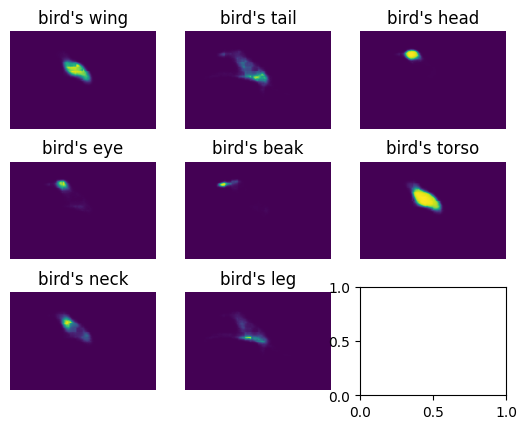

In [14]:
filename = 'datasets/PascalPart116/images/val/2008_000123.jpg'
results = model.inference([{'file_name': filename, 'sem_seg': torch.tensor(2)}])
git, axes = plt.subplots(3,3)
for ax, scores, text in zip(axes.flatten(), results[0]['sem_seg'][11:19, :, :], model.test_class_texts[11:19]):
    ax.imshow(scores)
    ax.axis('off')
    ax.title.set_text(text)

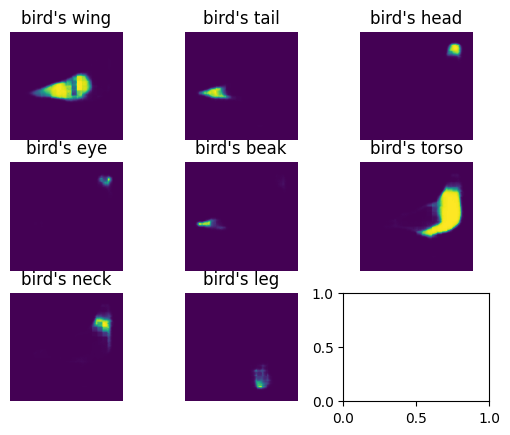

In [18]:
filename = '2010_004451_1.png'
results = model.inference([{'file_name': filename, 'sem_seg': torch.tensor(2)}])
git, axes = plt.subplots(3,3)
for ax, scores, text in zip(axes.flatten(), results[0]['sem_seg'][11:19, :, :], model.test_class_texts[11:19]):
    ax.imshow(scores)
    ax.axis('off')
    ax.title.set_text(text)